In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchsummary import summary
import matplotlib.pyplot as plt

from torchviz import make_dot
from torch.utils.data import DataLoader

from autoencoder import AutoEncoder



In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
data_path = "/home/amal/UbuntuDocuments/data/torch_datasets"

# train_data = datasets.CelebA(data_path, split="train", transform=transforms.PILToTensor(), download=True)
validation_data =  datasets.CelebA(data_path, split="valid", transform=transforms.PILToTensor(), download=True)

Files already downloaded and verified


In [4]:
#inspired by 
# https://github.com/AntixK/PyTorch-VAE/blob/master/models/beta_vae.py
        
latent_dim = 200

In [5]:
model = AutoEncoder(latent_dim=latent_dim).to(device)

In [6]:
dataloader = DataLoader(validation_data, batch_size=8)

In [7]:
model = AutoEncoder(latent_dim=latent_dim)
model.to(device)
for data in dataloader:
    input_image = data[0]
    tensor_input = torch.tensor(input_image/255, dtype=torch.float).to(device)
    print(tensor_input.shape)
    output = model(tensor_input)
    print(output.shape)
    
    break

/tmp/ipykernel_1726/903239845.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_input = torch.tensor(input_image/255, dtype=torch.float).to(device)


torch.Size([8, 3, 218, 178])
torch.Size([8, 3, 218, 178])


In [8]:
torch.tensor([3, 218, 178]).to(device).shape

torch.Size([3])

In [9]:
model = AutoEncoder(latent_dim=latent_dim)
summary(model.to(device), (3, 218, 178))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 16, 109, 89]             448
       BatchNorm2d-2          [-1, 16, 109, 89]              32
         LeakyReLU-3          [-1, 16, 109, 89]               0
            Conv2d-4           [-1, 32, 55, 45]           4,640
       BatchNorm2d-5           [-1, 32, 55, 45]              64
         LeakyReLU-6           [-1, 32, 55, 45]               0
            Conv2d-7           [-1, 64, 28, 23]          18,496
       BatchNorm2d-8           [-1, 64, 28, 23]             128
         LeakyReLU-9           [-1, 64, 28, 23]               0
           Conv2d-10          [-1, 128, 14, 12]          73,856
      BatchNorm2d-11          [-1, 128, 14, 12]             256
        LeakyReLU-12          [-1, 128, 14, 12]               0
           Conv2d-13            [-1, 256, 7, 6]         295,168
      BatchNorm2d-14            [-1, 25

In [10]:
output = output.detach().cpu()

In [11]:
index = 4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


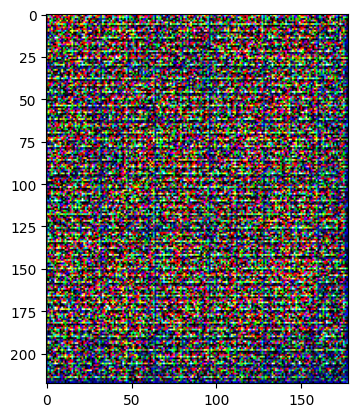

In [12]:
plt.imshow(output[index, :].permute(1, 2, 0))